In [125]:
import os
import csv
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [126]:
data_2011 = os.path.join("2011_nba_bigs_data.csv")
data_2012 = os.path.join("2012_nba_bigs_data.csv")
data_2013 = os.path.join("2013_nba_bigs_data.csv")
data_2014 = os.path.join("2014_nba_bigs_data.csv")
data_2015 = os.path.join("2015_nba_bigs_data.csv")
data_2016 = os.path.join("2016_nba_bigs_data.csv")
data_2017 = os.path.join("2017_nba_bigs_data_formatted.csv")
orig_2011 = pd.read_csv(data_2011)
orig_2012 = pd.read_csv(data_2012)
orig_2013 = pd.read_csv(data_2013)
orig_2014 = pd.read_csv(data_2014)
orig_2015 = pd.read_csv(data_2015)
orig_2016 = pd.read_csv(data_2016)
orig_2017 = pd.read_csv(data_2017)
orig_2017.head()

,Player,POSITION,Age,Tm,G,GS,MP,FG,FGA,FG%,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PS/G,2017 Salary
0,Anthony Davis,C,23,NO,75,NaN,36.1,10.3,20.3,0.505,...,2.3,9.5,11.8,2.1,1.3,2.2,2.4,2.2,28.0,22116750.0
1,DeMarcus Cousins,C,26,NO/SAC,72,NaN,34.2,9.0,19.9,0.452,...,2.1,8.9,11.0,4.6,1.4,1.3,3.7,3.9,27.0,16957900.0
2,Karl-Anthony Towns,C,21,MIN,82,NaN,37.0,9.8,18.0,0.542,...,3.6,8.7,12.3,2.7,0.7,1.3,2.6,2.9,25.1,5960160.0
3,Blake Griffin,PF,27,LAC,61,NaN,34.0,7.9,15.9,0.493,...,1.8,6.3,8.1,4.9,0.9,0.4,2.3,2.6,21.6,20140838.0
4,Brook Lopez,C,28,BKN,75,NaN,29.6,7.4,15.6,0.474,...,1.6,3.8,5.4,2.3,0.5,1.7,2.5,2.6,20.5,21165675.0


In [127]:
#Replace all blank data with a '0'
orig_2011 = orig_2011.fillna(0)
orig_2012 = orig_2012.fillna(0)
orig_2013 = orig_2013.fillna(0)
orig_2014 = orig_2014.fillna(0)
orig_2015 = orig_2015.fillna(0)
orig_2016 = orig_2016.fillna(0)
orig_2017 = orig_2017.fillna(0)

In [128]:
orig_2011["Total Min"] = orig_2011["G"] * orig_2011["MP"]
orig_2012["Total Min"] = orig_2012["G"] * orig_2012["MP"]
orig_2013["Total Min"] = orig_2013["G"] * orig_2013["MP"]
orig_2014["Total Min"] = orig_2014["G"] * orig_2014["MP"]
orig_2015["Total Min"] = orig_2015["G"] * orig_2015["MP"]
orig_2016["Total Min"] = orig_2016["G"] * orig_2016["MP"]
orig_2017["Total Min"] = orig_2017["G"] * orig_2017["MP"]
orig_2011["2011 Salary (MM)"] = orig_2011["2011 Salary"] / 1000000
orig_2012["2012 Salary (MM)"] = orig_2012["2012 Salary"] / 1000000
orig_2013["2013 Salary (MM)"] = orig_2013["2013 Salary"] / 1000000
orig_2014["2014 Salary (MM)"] = orig_2014["2014 Salary"] / 1000000
orig_2015["2015 Salary (MM)"] = orig_2015["2015 Salary"] / 1000000
orig_2016["2016 Salary (MM)"] = orig_2016["2016 Salary"] / 1000000
orig_2017["2017 Salary (MM)"] = orig_2017["2017 Salary"] / 1000000

In [129]:
orig_2011.head()

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,TRB,AST,STL,BLK,TOV,PF,PS/G,2011 Salary,Total Min,2011 Salary (MM)
0,Solomon Alabi,C,22,TOR,12,0,4.9,0.3,1.3,0.200,...,1.2,0.2,0.2,0.2,0.3,0.4,0.5,830000,58.8,0.8300
1,Cole Aldrich,C,22,OKC,18,0,7.9,0.4,0.8,0.533,...,1.9,0.2,0.3,0.4,0.4,1.7,1.0,2286000,142.2,2.2860
2,LaMarcus Aldridge,PF,25,POR,81,81,39.6,8.7,17.5,0.500,...,8.8,2.1,1.0,1.2,1.9,2.7,21.8,12372000,3207.6,12.3720
3,Chris Andersen,C,32,DEN,45,0,16.3,1.8,3.0,0.599,...,4.9,0.4,0.5,1.3,0.6,1.8,5.6,4234000,733.5,4.2340
4,Ryan Anderson,PF,22,ORL,64,14,22.3,3.5,8.2,0.430,...,5.5,0.8,0.5,0.6,0.8,2.1,10.6,2244600,1427.2,2.2446


In [130]:
orig_2011['3P%'] = (orig_2011['3P%'] * 100).map('{:.2f}'.format)
orig_2011['2011 Salary (MM)'] = orig_2011['2011 Salary (MM)'].map('{:,.3f}'.format)
orig_2012['3P%'] = (orig_2012['3P%'] * 100).map('{:.2f}'.format)
orig_2012['2012 Salary (MM)'] = orig_2012['2012 Salary (MM)'].map('{:,.3f}'.format)
orig_2013['3P%'] = (orig_2013['3P%'] * 100).map('{:.2f}'.format)
orig_2013['2013 Salary (MM)'] = orig_2013['2013 Salary (MM)'].map('{:,.3f}'.format)
orig_2014['3P%'] = (orig_2014['3P%'] * 100).map('{:.2f}'.format)
orig_2014['2014 Salary (MM)'] = orig_2014['2014 Salary (MM)'].map('{:,.3f}'.format)
orig_2015['3P%'] = (orig_2015['3P%'] * 100).map('{:.2f}'.format)
orig_2015['2015 Salary (MM)'] = orig_2015['2015 Salary (MM)'].map('{:,.3f}'.format)
orig_2016['3P%'] = (orig_2016['3P%'] * 100).map('{:.2f}'.format)
orig_2016['2016 Salary (MM)'] = orig_2016['2016 Salary (MM)'].map('{:,.3f}'.format)
orig_2017['3P%'] = (orig_2017['3P%'] * 100).map('{:.2f}'.format)
orig_2017['2017 Salary (MM)'] = orig_2017['2017 Salary (MM)'].map('{:,.3f}'.format)

In [131]:
orig_2011.head()

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,TRB,AST,STL,BLK,TOV,PF,PS/G,2011 Salary,Total Min,2011 Salary (MM)
0,Solomon Alabi,C,22,TOR,12,0,4.9,0.3,1.3,0.200,...,1.2,0.2,0.2,0.2,0.3,0.4,0.5,830000,58.8,0.830
1,Cole Aldrich,C,22,OKC,18,0,7.9,0.4,0.8,0.533,...,1.9,0.2,0.3,0.4,0.4,1.7,1.0,2286000,142.2,2.286
2,LaMarcus Aldridge,PF,25,POR,81,81,39.6,8.7,17.5,0.500,...,8.8,2.1,1.0,1.2,1.9,2.7,21.8,12372000,3207.6,12.372
3,Chris Andersen,C,32,DEN,45,0,16.3,1.8,3.0,0.599,...,4.9,0.4,0.5,1.3,0.6,1.8,5.6,4234000,733.5,4.234
4,Ryan Anderson,PF,22,ORL,64,14,22.3,3.5,8.2,0.430,...,5.5,0.8,0.5,0.6,0.8,2.1,10.6,2244600,1427.2,2.245


In [132]:
renamed_2011 = orig_2011.rename(columns={'Age':'2011 Age', '3P':'2011 3P', '3PA':'2011 3PA', '3P%':'2011 3P%', 
       '2PA':'2011 2PA', 'TRB':'2011 Reb', 'BLK':'2011 Blk', 'PS/G': '2011 Pts/Gm', 'Total Min':'2011 Total Min'})
renamed_2012 = orig_2012.rename(columns={'Age':'2012 Age', '3P':'2012 3P', '3PA':'2012 3PA', '3P%':'2012 3P%', 
       '2PA':'2012 2PA', 'TRB':'2012 Reb', 'BLK':'2012 Blk', 'PS/G': '2012 Pts/Gm', 'Total Min':'2012 Total Min'})
renamed_2013 = orig_2013.rename(columns={'Age':'2013 Age', '3P':'2013 3P', '3PA':'2013 3PA', '3P%':'2013 3P%', 
       '2PA':'2013 2PA', 'TRB':'2013 Reb', 'BLK':'2013 Blk', 'PS/G':'2013 Pts/Gm', 'Total Min':'2013 Total Min'})
renamed_2014 = orig_2014.rename(columns={'Age':'2014 Age', '3P':'2014 3P', '3PA':'2014 3PA', '3P%':'2014 3P%', 
       '2PA':'2014 2PA', 'TRB':'2014 Reb', 'BLK':'2014 Blk', 'PS/G':'2014 Pts/Gm', 'Total Min':'2014 Total Min'})
renamed_2015 = orig_2015.rename(columns={'Age':'2015 Age', '3P':'2015 3P', '3PA':'2015 3PA', '3P%':'2015 3P%', 
       '2PA':'2015 2PA', 'TRB':'2015 Reb', 'BLK':'2015 Blk', 'PS/G':'2015 Pts/Gm', 'Total Min':'2015 Total Min'})
renamed_2016 = orig_2016.rename(columns={'Age':'2016 Age', '3P':'2016 3P', '3PA':'2016 3PA', '3P%':'2016 3P%', 
       '2PA':'2016 2PA', 'TRB':'2016 Reb', 'BLK':'2016 Blk', 'PS/G':'2016 Pts/Gm', 'Total Min':'2016 Total Min'})
renamed_2017 = orig_2017.rename(columns={'POSITION':'Pos', 'Age':'2017 Age', '3P':'2017 3P', '3PA':'2017 3PA', '3P%':'2017 3P%',
       '2PA':'2017 2PA', 'TRB':'2017 Reb', 'BLK':'2017 Blk', 'PS/G':'2017 Pts/Gm', 'Total Min':'2017 Total Min'})
renamed_2017.head()

,Player,Pos,2017 Age,Tm,G,GS,MP,FG,FGA,FG%,...,2017 Reb,AST,STL,2017 Blk,TOV,PF,2017 Pts/Gm,2017 Salary,2017 Total Min,2017 Salary (MM)
0,Anthony Davis,C,23,NO,75,0.0,36.1,10.3,20.3,0.505,...,11.8,2.1,1.3,2.2,2.4,2.2,28.0,22116750.0,2707.5,22.117
1,DeMarcus Cousins,C,26,NO/SAC,72,0.0,34.2,9.0,19.9,0.452,...,11.0,4.6,1.4,1.3,3.7,3.9,27.0,16957900.0,2462.4,16.958
2,Karl-Anthony Towns,C,21,MIN,82,0.0,37.0,9.8,18.0,0.542,...,12.3,2.7,0.7,1.3,2.6,2.9,25.1,5960160.0,3034.0,5.960
3,Blake Griffin,PF,27,LAC,61,0.0,34.0,7.9,15.9,0.493,...,8.1,4.9,0.9,0.4,2.3,2.6,21.6,20140838.0,2074.0,20.141
4,Brook Lopez,C,28,BKN,75,0.0,29.6,7.4,15.6,0.474,...,5.4,2.3,0.5,1.7,2.5,2.6,20.5,21165675.0,2220.0,21.166


In [134]:
#Condense to only wanted columns
condensed_2011 = renamed_2011[['Player', 'Pos', '2011 Age', '2011 3P', '2011 3PA', '2011 3P%', '2011 2PA', '2011 Reb',
        '2011 Blk', '2011 Pts/Gm', '2011 Salary', '2011 Salary (MM)', '2011 Total Min']]
condensed_2012 = renamed_2012[['Player', 'Pos', '2012 Age', '2012 3P', '2012 3PA', '2012 3P%', '2012 2PA', '2012 Reb',
        '2012 Blk', '2012 Pts/Gm', '2012 Salary', '2012 Salary (MM)', '2012 Total Min']]
condensed_2013 = renamed_2013[['Player', 'Pos', '2013 Age', '2013 3P', '2013 3PA', '2013 3P%', '2013 2PA', '2013 Reb',
        '2013 Blk', '2013 Pts/Gm', '2013 Salary', '2013 Salary (MM)', '2013 Total Min']]
condensed_2014 = renamed_2014[['Player', 'Pos', '2014 Age', '2014 3P', '2014 3PA', '2014 3P%', '2014 2PA', '2014 Reb',
        '2014 Blk', '2014 Pts/Gm', '2014 Salary', '2014 Salary (MM)', '2014 Total Min']]
condensed_2015 = renamed_2015[['Player', 'Pos', '2015 Age', '2015 3P', '2015 3PA', '2015 3P%', '2015 2PA', '2015 Reb',
        '2015 Blk', '2015 Pts/Gm', '2015 Salary', '2015 Salary (MM)', '2015 Total Min']]
condensed_2016 = renamed_2016[['Player', 'Pos', '2016 Age', '2016 3P', '2016 3PA', '2016 3P%', '2016 2PA', '2016 Reb',
        '2016 Blk', '2016 Pts/Gm', '2016 Salary', '2016 Salary (MM)', '2016 Total Min']]
condensed_2017 = renamed_2017[['Player', 'Pos', '2017 Age', '2017 3P', '2017 3PA', '2017 3P%', '2017 2PA', '2017 Reb',
        '2017 Blk', '2017 Pts/Gm', '2017 Salary', '2017 Salary (MM)', '2017 Total Min']]

In [135]:
condensed_2011.head()

,Player,Pos,2011 Age,2011 3P,2011 3PA,2011 3P%,2011 2PA,2011 Reb,2011 Blk,2011 Pts/Gm,2011 Salary,2011 Salary (MM),2011 Total Min
0,Solomon Alabi,C,22,0.0,0.0,0.00,1.3,1.2,0.2,0.5,830000,0.830,58.8
1,Cole Aldrich,C,22,0.0,0.0,0.00,0.8,1.9,0.4,1.0,2286000,2.286,142.2
2,LaMarcus Aldridge,PF,25,0.0,0.3,17.40,17.2,8.8,1.2,21.8,12372000,12.372,3207.6
3,Chris Andersen,C,32,0.0,0.0,0.00,3.0,4.9,1.3,5.6,4234000,4.234,733.5
4,Ryan Anderson,PF,22,2.1,5.3,39.30,2.9,5.5,0.6,10.6,2244600,2.245,1427.2


In [136]:
#Use only players who played greater than the season's Mean for Total Minutes Played (gets ~Top 75% of each season)
Min_Mean_2011 = condensed_2011[(condensed_2011['2011 Total Min'] >= [(condensed_2011['2011 Total Min'].mean())])]
Min_Mean_2012 = condensed_2012[(condensed_2012['2012 Total Min'] >= [(condensed_2012['2012 Total Min'].mean())])]
Min_Mean_2013 = condensed_2013[(condensed_2013['2013 Total Min'] >= [(condensed_2013['2013 Total Min'].mean())])]
Min_Mean_2014 = condensed_2014[(condensed_2014['2014 Total Min'] >= [(condensed_2014['2014 Total Min'].mean())])]
Min_Mean_2015 = condensed_2015[(condensed_2015['2015 Total Min'] >= [(condensed_2015['2015 Total Min'].mean())])]
Min_Mean_2016 = condensed_2016[(condensed_2016['2016 Total Min'] >= [(condensed_2016['2016 Total Min'].mean())])]
Min_Mean_2017 = condensed_2017[(condensed_2017['2017 Total Min'] >= [(condensed_2017['2017 Total Min'].mean())])]
Min_Mean_2011.head()

,Player,Pos,2011 Age,2011 3P,2011 3PA,2011 3P%,2011 2PA,2011 Reb,2011 Blk,2011 Pts/Gm,2011 Salary,2011 Salary (MM),2011 Total Min
2,LaMarcus Aldridge,PF,25,0.0,0.3,17.40,17.2,8.8,1.2,21.8,12372000,12.372,3207.6
4,Ryan Anderson,PF,22,2.1,5.3,39.30,2.9,5.5,0.6,10.6,2244600,2.245,1427.2
5,Joel Anthony,C,28,0.0,0.0,0.00,1.3,3.5,1.2,2.0,3600000,3.600,1462.5
6,Darrell Arthur,PF,22,0.0,0.1,0.00,7.7,4.3,0.8,9.1,2027118,2.027,1608.0
8,Andrea Bargnani,C,25,1.2,3.4,34.50,14.4,5.2,0.7,21.4,9250000,9.250,2356.2


In [137]:
#Replacing 'Pos' that are not 'C' or 'PF'... Used ".value_counts" on each DF['Pos'] to find out where there was anything else
Min_Mean_2011 = Min_Mean_2011.replace({'SF-PF':'PF', 'SF':'PF'})
Min_Mean_2012 = Min_Mean_2012.replace({'SF':'PF'})
Min_Mean_2013 = Min_Mean_2013.replace({'C-PF':'C', 'PF-SF':'PF', 'SF':'PF'})
Min_Mean_2014 = Min_Mean_2014.replace({'SF-PF':'PF', 'SF':'PF'})
Min_Mean_2016 = Min_Mean_2016.replace({'SF':'PF'})
Min_Mean_2011['Pos'].value_counts()

PF    40
C     32
Name: Pos, dtype: int64

In [138]:
#Find Count of Each Position included in Each Year
print('2011')
print(Min_Mean_2011['Pos'].value_counts())
print('2012')
print(Min_Mean_2012['Pos'].value_counts())
print('2013')
print(Min_Mean_2013['Pos'].value_counts())
print('2014')
print(Min_Mean_2014['Pos'].value_counts())
print('2015')
print(Min_Mean_2015['Pos'].value_counts())
print('2016')
print(Min_Mean_2016['Pos'].value_counts())
print('2017')
print(Min_Mean_2017['Pos'].value_counts())

2011
PF    40
C     32
Name: Pos, dtype: int64
2012
PF    42
C     26
Name: Pos, dtype: int64
2013
PF    38
C     34
Name: Pos, dtype: int64
2014
PF    41
C     28
Name: Pos, dtype: int64
2015
PF    38
C     34
Name: Pos, dtype: int64
2016
C     36
PF    33
Name: Pos, dtype: int64
2017
PF    46
C     43
Name: Pos, dtype: int64


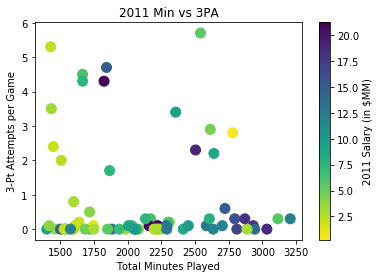

In [148]:
plt.scatter(Min_Mean_2011['2011 Total Min'], Min_Mean_2011['2011 3PA'], c=Min_Mean_2011['2011 Salary (MM)'], 
            cmap='viridis_r', s=100)
plt.title('2011 Min vs 3PA')
plt.xlabel('Total Minutes Played')
plt.ylabel('3-Pt Attempts per Game')
plt.colorbar(label='2011 Salary (in $MM)')
plt.savefig('2011 Data')
plt.show()

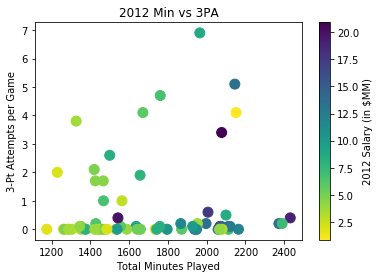

In [141]:
plt.scatter(Min_Mean_2012['2012 Total Min'], Min_Mean_2012['2012 3PA'], c=Min_Mean_2012['2012 Salary (MM)'], 
            cmap='viridis_r', s=100)
plt.title('2012 Min vs 3PA')
plt.xlabel('Total Minutes Played')
plt.ylabel('3-Pt Attempts per Game')
plt.colorbar(label='2012 Salary (in $MM)')
plt.savefig('2012 Data')
plt.show()

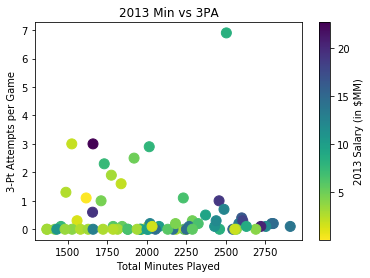

In [142]:
plt.scatter(Min_Mean_2013['2013 Total Min'], Min_Mean_2013['2013 3PA'], c=Min_Mean_2013['2013 Salary (MM)'], 
            cmap='viridis_r', s=100)
plt.title('2013 Min vs 3PA')
plt.xlabel('Total Minutes Played')
plt.ylabel('3-Pt Attempts per Game')
plt.colorbar(label='2013 Salary (in $MM)')
plt.savefig('2013 Data')
plt.show()

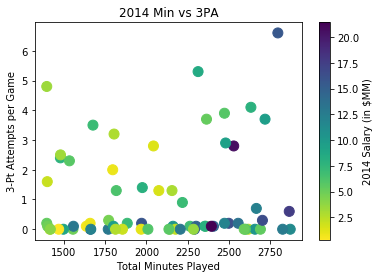

In [143]:
plt.scatter(Min_Mean_2014['2014 Total Min'], Min_Mean_2014['2014 3PA'], c=Min_Mean_2014['2014 Salary (MM)'], 
            cmap='viridis_r', s=100)
plt.title('2014 Min vs 3PA')
plt.xlabel('Total Minutes Played')
plt.ylabel('3-Pt Attempts per Game')
plt.colorbar(label='2014 Salary (in $MM)')
plt.savefig('2014 Data')
plt.show()

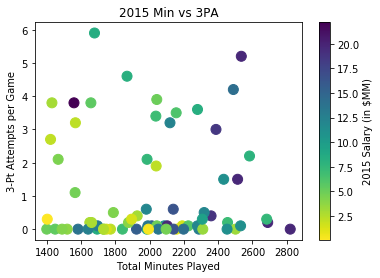

In [144]:
plt.scatter(Min_Mean_2015['2015 Total Min'], Min_Mean_2015['2015 3PA'], c=Min_Mean_2015['2015 Salary (MM)'], 
            cmap='viridis_r', s=100)
plt.title('2015 Min vs 3PA')
plt.xlabel('Total Minutes Played')
plt.ylabel('3-Pt Attempts per Game')
plt.colorbar(label='2015 Salary (in $MM)')
plt.savefig('2015 Data')
plt.show()

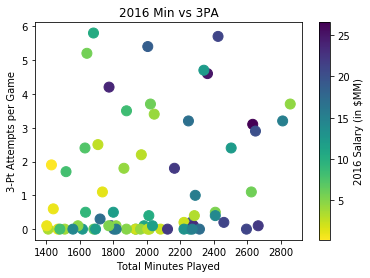

In [145]:
plt.scatter(Min_Mean_2016['2016 Total Min'], Min_Mean_2016['2016 3PA'], c=Min_Mean_2016['2016 Salary (MM)'], 
            cmap='viridis_r', s=100)
plt.title('2016 Min vs 3PA')
plt.xlabel('Total Minutes Played')
plt.ylabel('3-Pt Attempts per Game')
plt.colorbar(label='2016 Salary (in $MM)')
plt.savefig('2016 Data')
plt.show()

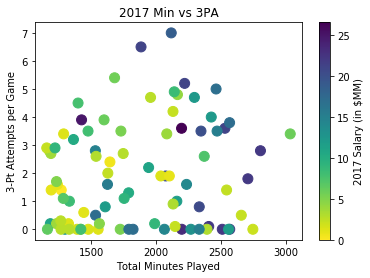

In [146]:
plt.scatter(Min_Mean_2017['2017 Total Min'], Min_Mean_2017['2017 3PA'], c=Min_Mean_2017['2017 Salary (MM)'], 
            cmap='viridis_r', s=100)
plt.title('2017 Min vs 3PA')
plt.xlabel('Total Minutes Played')
plt.ylabel('3-Pt Attempts per Game')
plt.colorbar(label='2017 Salary (in $MM)')
plt.savefig('2017 Data')
plt.show()

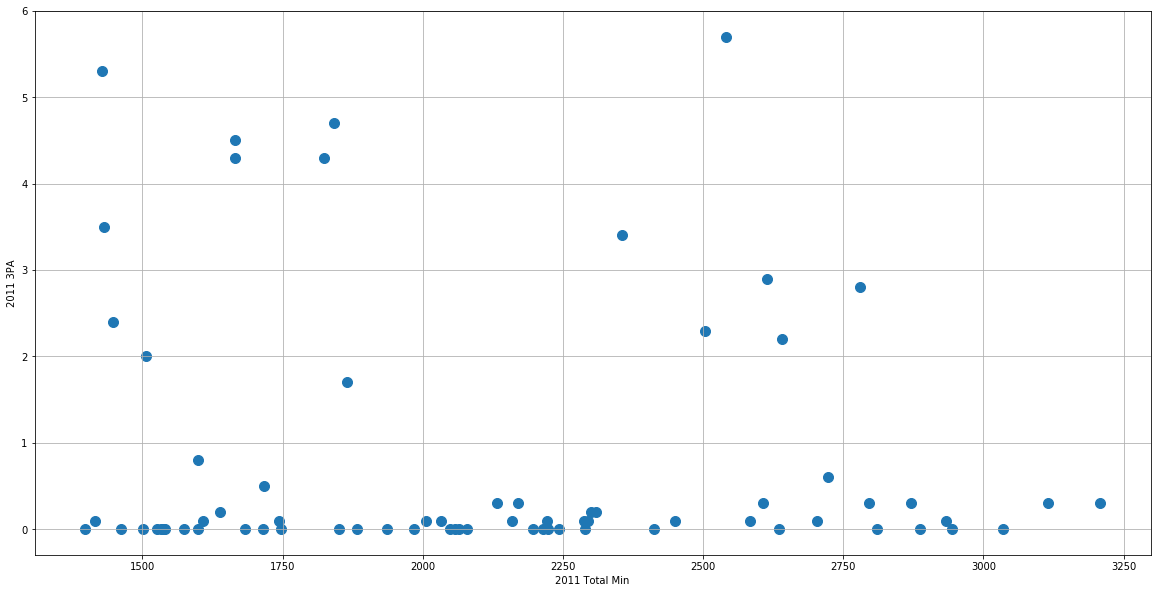

In [89]:
Min_Mean_2011.plot(kind='scatter', x='2011 Total Min', y='2011 3PA', grid=True, s=100, figsize=(20,10))
plt.show()

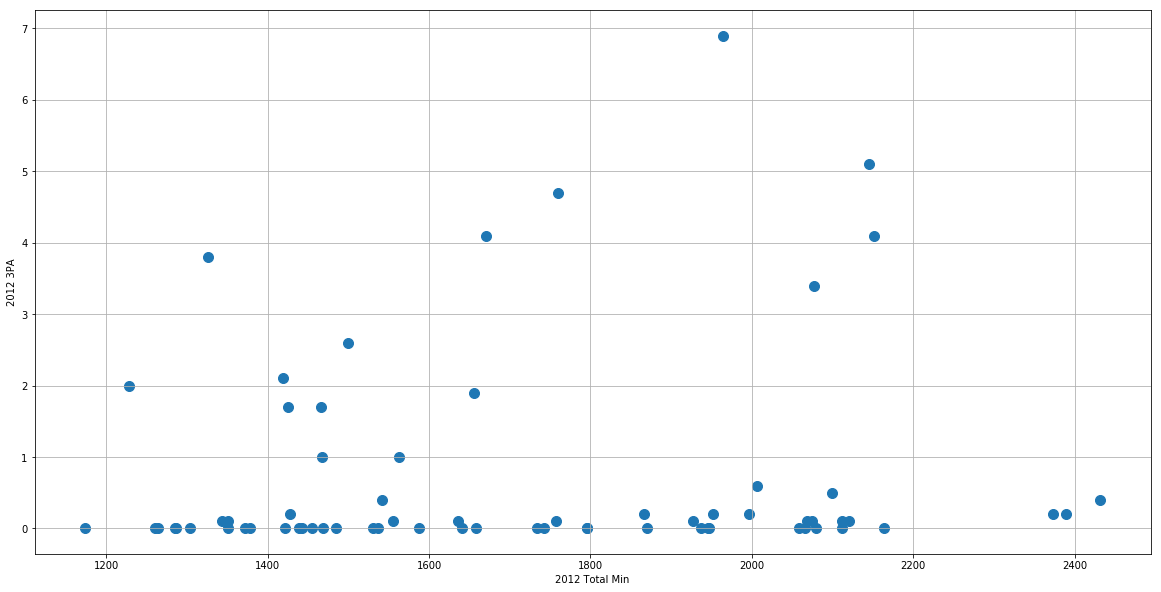

In [90]:
Min_Mean_2012.plot(kind='scatter', x='2012 Total Min', y='2012 3PA', grid=True, s=100, figsize=(20,10))
plt.show()

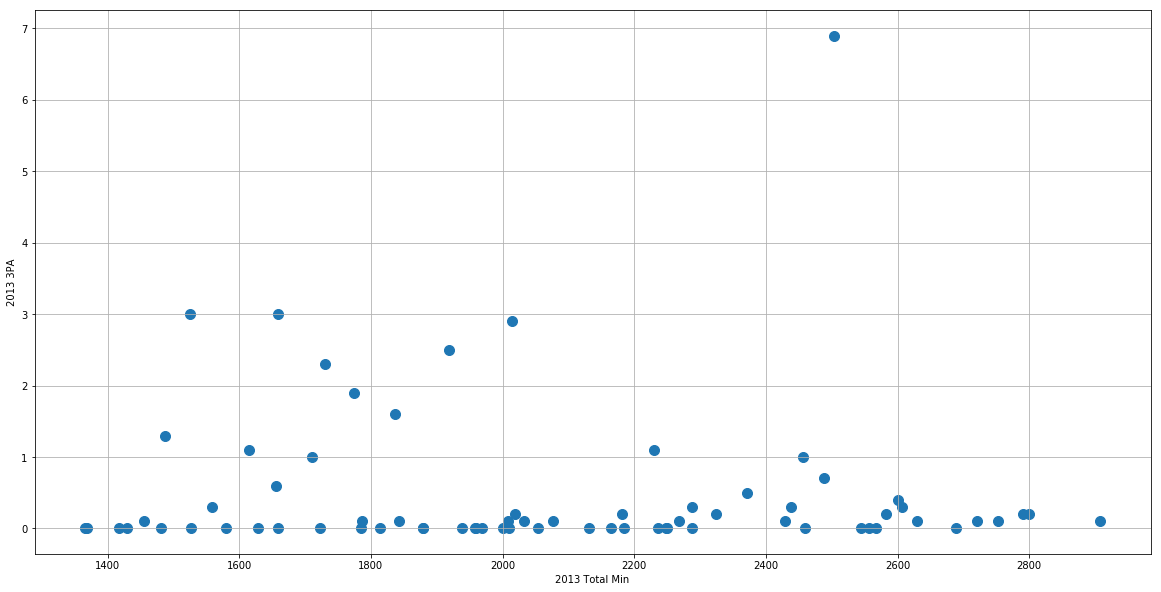

In [94]:
Min_Mean_2013.plot(kind='scatter', x='2013 Total Min', y='2013 3PA', grid=True, s=100, figsize=(20,10))
plt.show()

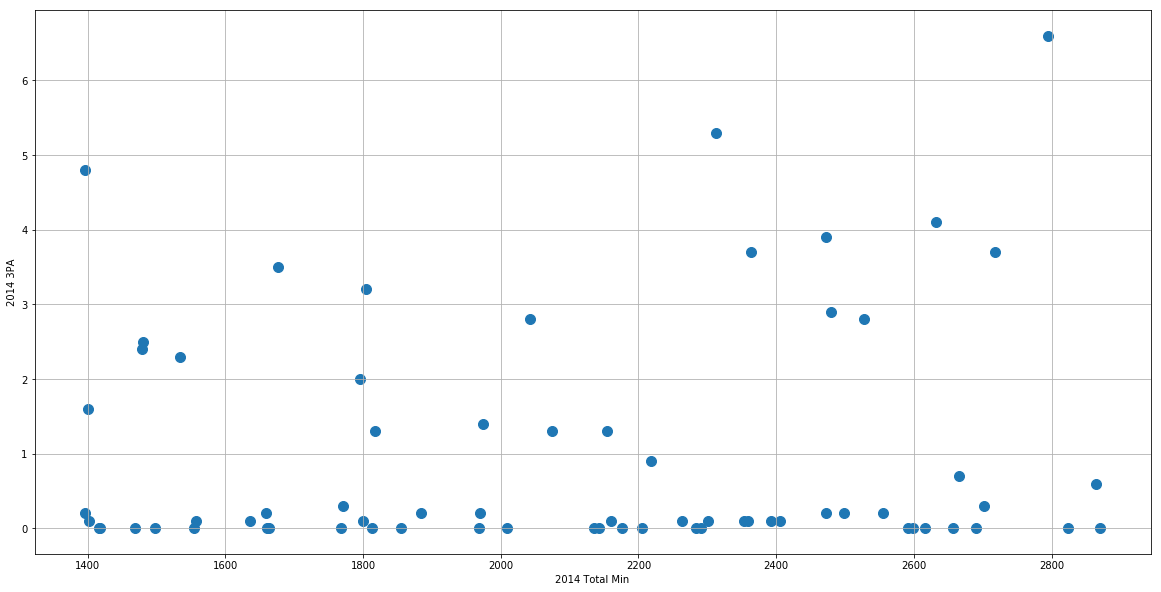

In [95]:
Min_Mean_2014.plot(kind='scatter', x='2014 Total Min', y='2014 3PA', grid=True, s=100, figsize=(20,10))
plt.show()

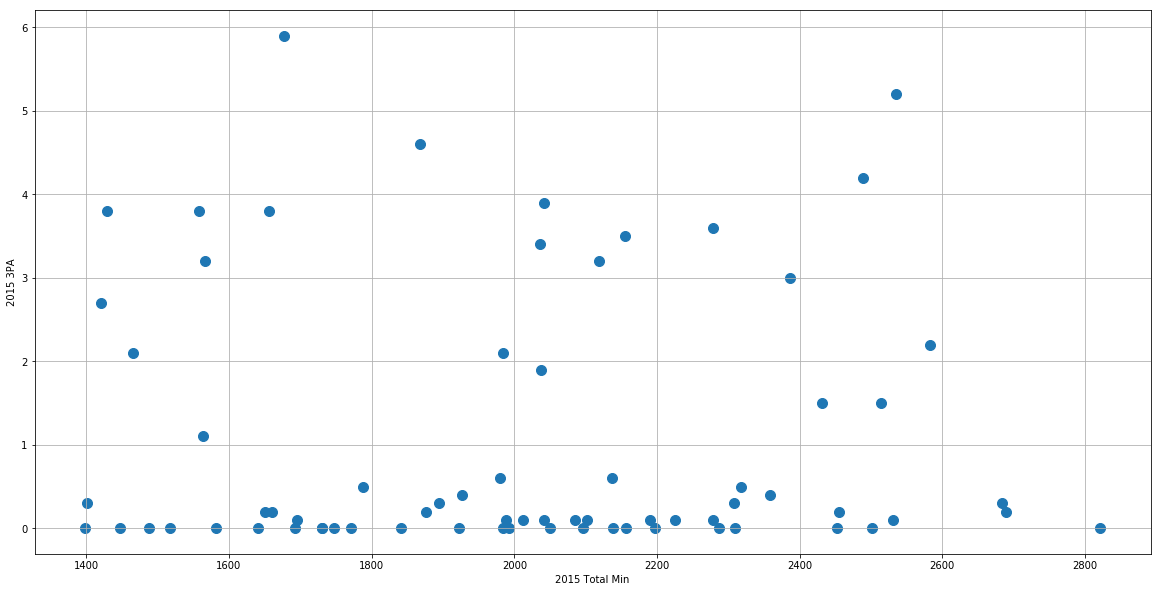

In [96]:
Min_Mean_2015.plot(kind='scatter', x='2015 Total Min', y='2015 3PA', grid=True, s=100, figsize=(20,10))
plt.show()

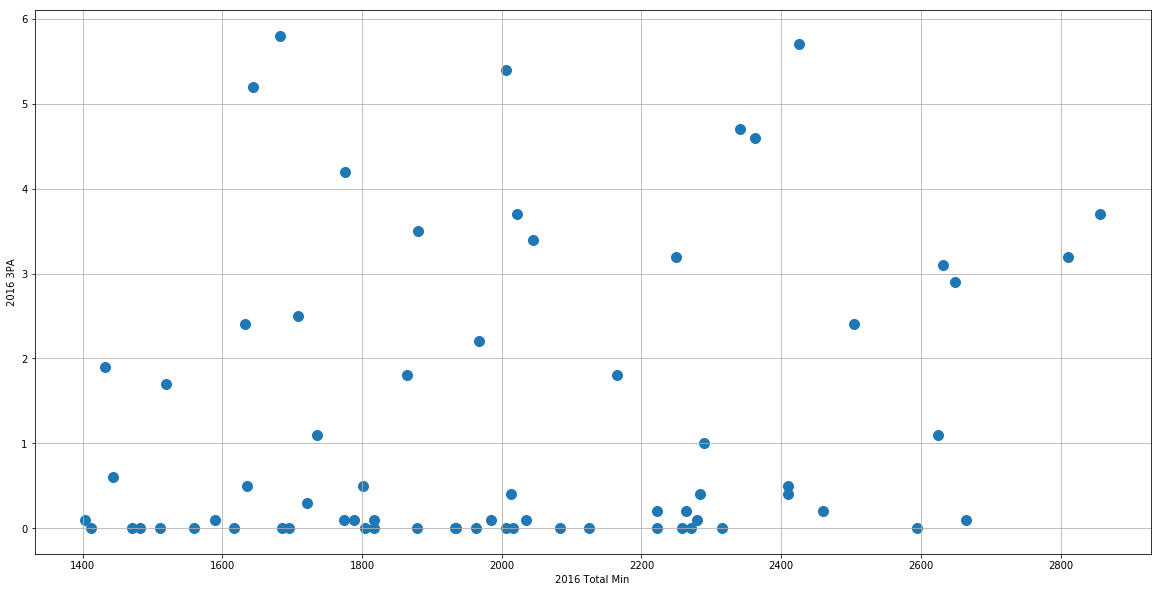

In [97]:
Min_Mean_2016.plot(kind='scatter', x='2016 Total Min', y='2016 3PA', grid=True, s=100, figsize=(20,10))
plt.show()

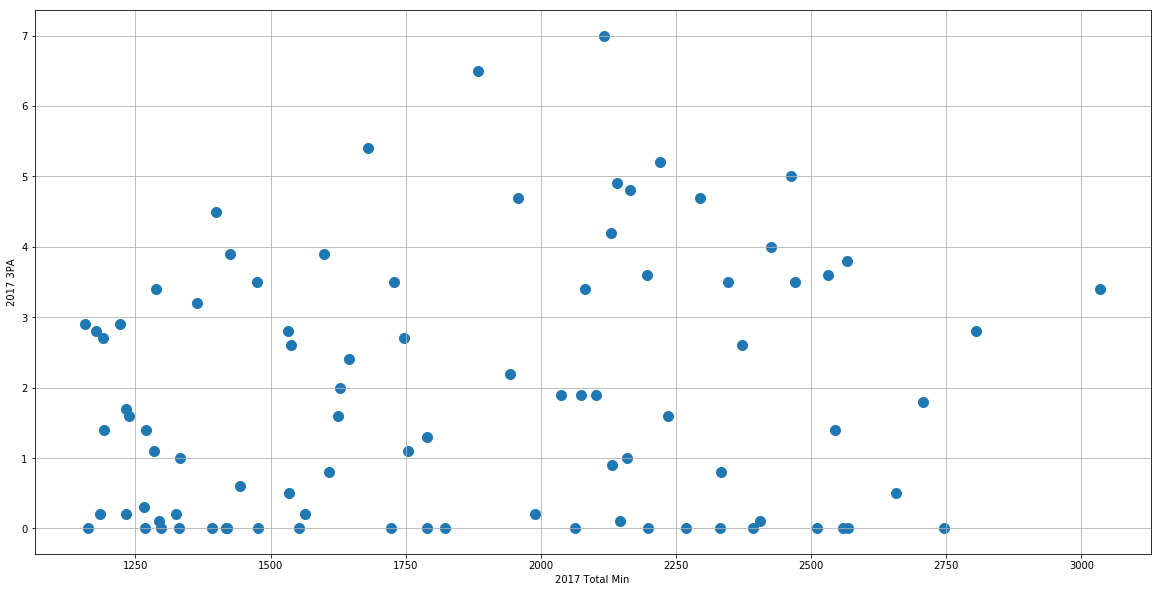

In [98]:
Min_Mean_2017.plot(kind='scatter', x='2017 Total Min', y='2017 3PA', grid=True, s=100, figsize=(20,10))
plt.show()

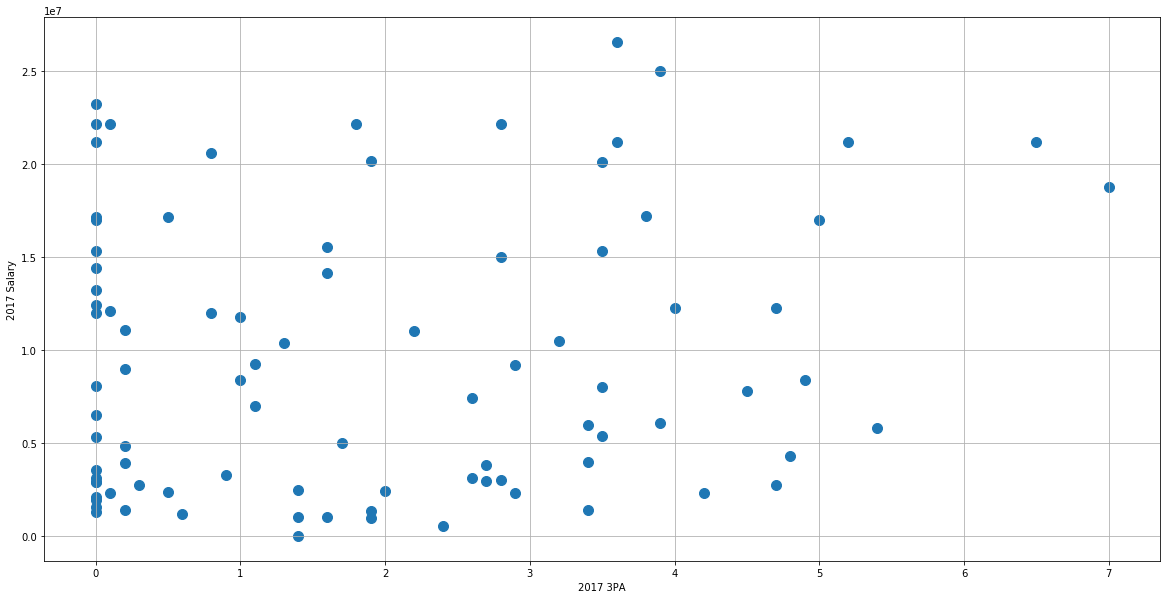

In [103]:
Min_Mean_2017.plot(kind='scatter', x='2017 3PA', y='2017 Salary', grid=True, s=100, figsize=(20,10))
plt.show()